# DSTL Satellite Imagery Feature Detection


In [1]:
#TODO: CORRECT UTILS FUNCTION TO INCLUDE INTERIOR
# WRITE UP DATA EXP

In [2]:
import pandas as pd
import rasterio
from rasterio import mask as raster_mask
import geopandas as gpd
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import os
from rasterio import plot as rplot
import numpy as np
import glob
import shapely
from shapely import speedups

speedups.disable()

%matplotlib inline

In [3]:
import utils

In [3]:
image_id = '6010_1_2'

test_img = rasterio.open(os.path.join('three_band',image_id+'.tif'))

C:\ProgramData\Miniconda3\envs\gis_test\lib\site-packages\rasterio\__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [4]:
h,w = test_img.height, test_img.width

In [5]:
print(test_img.shape)

(3349, 3396)


In [13]:
print(np.ndarray((1,h,w)).shape)

(1, 3349, 3396)


In [14]:
test_img.read().shape

(3, 3349, 3396)

In [15]:
test_img.close()

In [15]:
np.where(nd_test==0,1,nd_test)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [3]:
grid_sizes = utils.get_grid_sizes()

c:\program files\python38\lib\site-packages\rasterio\__init__.py:229: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Three Band size: H:3349, W:3391
Sixteen Band size: H:3348, W:3391
Three Band size: H:3349, W:3391
Sixteen Band size: H:3348, W:3391
Three Band size: H:3349, W:3391
Sixteen Band size: H:3348, W:3391
Three Band size: H:3349, W:3391
Sixteen Band size: H:3348, W:3391
Three Band size: H:3349, W:3387
Sixteen Band size: H:3348, W:3388


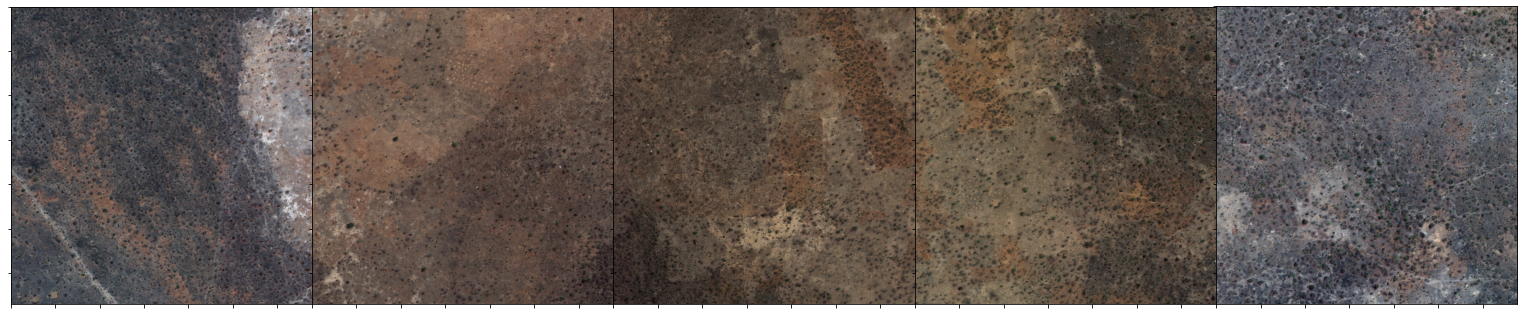

In [4]:
#image files

base = '6040'
base_names = []
for i in range(5):
    row = i
    for j in range(5):
        col = j
        base_names.append(base+'_'+str(row)+'_'+str(col)+'.tif')

fig, axes = plt.subplots(1,5,figsize=(27,7))

plt.subplots_adjust(wspace=0, hspace=0)

for i,file in enumerate(base_names[0:5]):
    image = rasterio.open(os.path.join('three_band',file))
    image_16 = rasterio.open(os.path.join('sixteen_band',file[:-4]+'_P.tif'))
    print(f"Three Band size: H:{image.height}, W:{image.width}")
    print(f"Sixteen Band size: H:{image_16.height}, W:{image_16.width}")
    scaled_image = utils.scale_pixels(image)
    
    axes[i].set_xticklabels([])
    axes[i].set_yticklabels([])
    
    rplot.show(scaled_image,ax=axes[i])
    image.close()
    image_16.close()
    

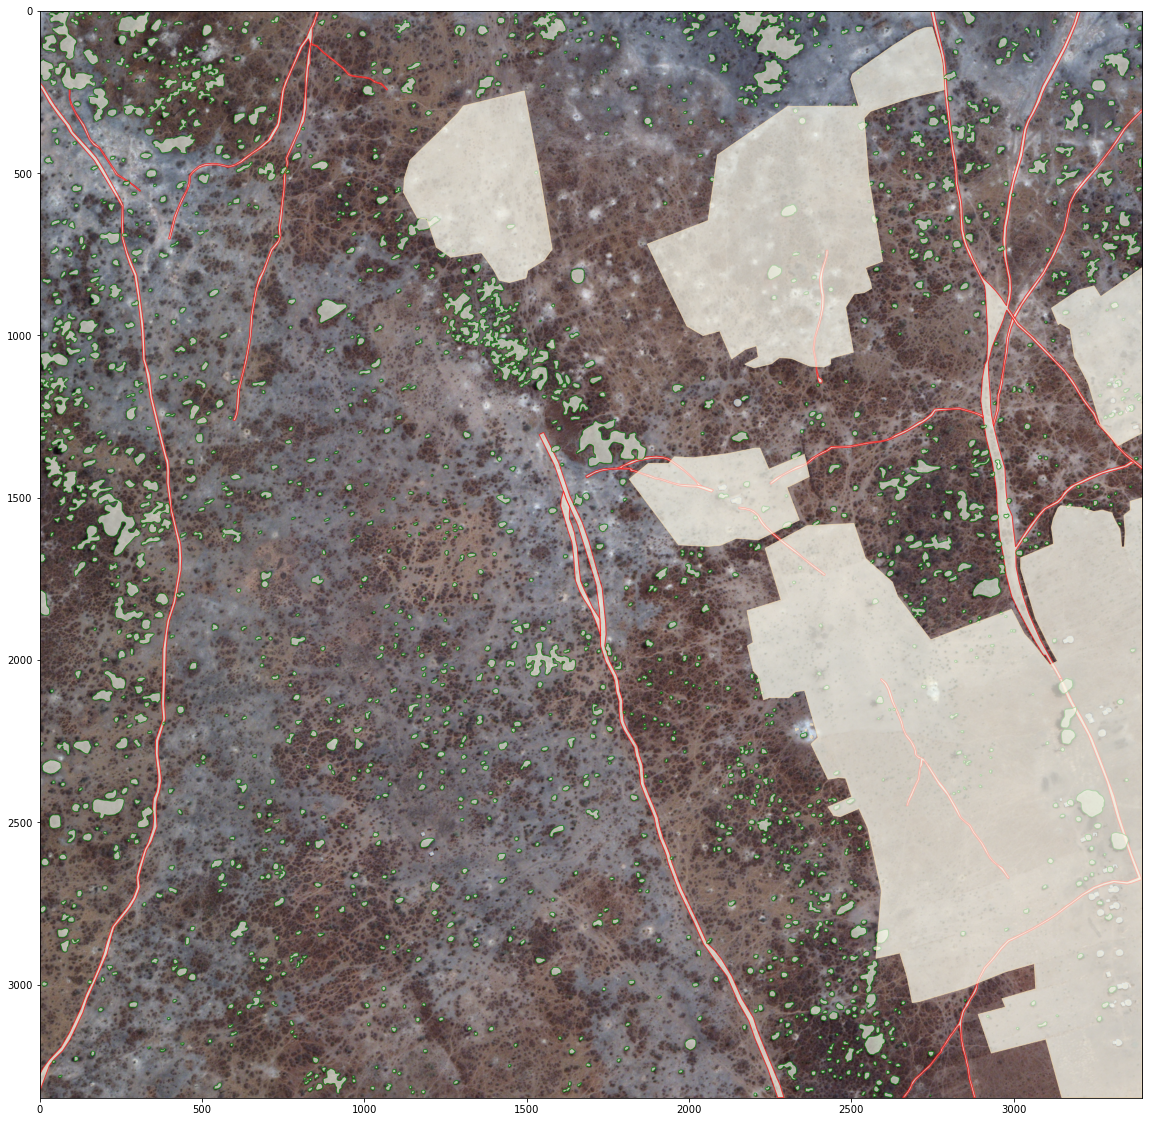

In [5]:
image_id = '6010_1_2'

test_img = rasterio.open(os.path.join('three_band',image_id+'.tif'))
scaled_test = utils.scale_pixels(test_img)

test_poly = utils.get_labeled_polygons(image_id, grid_sizes)

fig, ax = plt.subplots(1,figsize=(20,20))
utils.plot_polys(test_poly,axes=ax)
rplot.show(scaled_test,ax=ax)
test_img.close()

c:\program files\python38\lib\site-packages\rasterio\__init__.py:229: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
c:\program files\python38\lib\site-packages\rasterio\__init__.py:229: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


6040_1_1: is not a training image
no polygons to plot
6040_1_2: is not a training image
no polygons to plot


c:\program files\python38\lib\site-packages\rasterio\__init__.py:229: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


6040_1_4: is not a training image
no polygons to plot


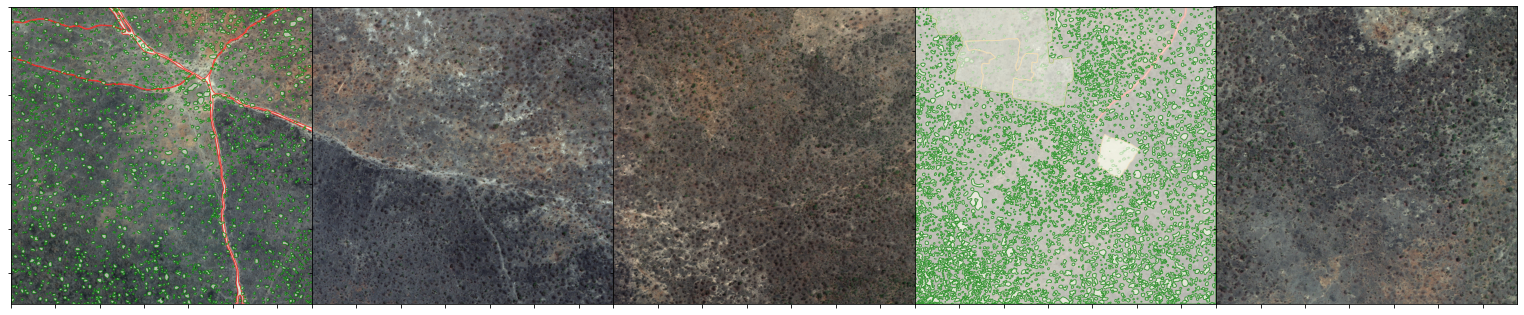

In [6]:
fig, axes = plt.subplots(1,5,figsize=(27,7))

plt.subplots_adjust(wspace=0, hspace=0)

for i,file in enumerate(base_names[5:10]):
    image = rasterio.open(os.path.join('three_band',file))
    scaled_image = utils.scale_pixels(image)
    
    poly = utils.get_labeled_polygons(file[:-4], grid_sizes)
    if bool(poly):
        gdf_list = []
        for key in list(poly.keys()):
            df = pd.DataFrame()
            df['geometry'] = poly[key]
            df['class_type'] = key

            gdf_list.append(df)

    concat = gpd.GeoDataFrame(pd.concat(gdf_list,ignore_index=True))
    concat.crs = "EPSG:4326"
    concat['geometry'] = concat['geometry'].affine_transform([1, 0, 0, -1, 0, 0])
    concat.to_file(os.path.join('gdf',f'gdf_{i}.shp'))
    axes[i].set_xticklabels([])
    axes[i].set_yticklabels([])
    
    utils.plot_polys(poly,axes=axes[i])
    
    rplot.show(scaled_image,ax=axes[i])
    image.close()

In [7]:
### Explore training file

In [35]:
wkt_train = pd.read_csv('train_wkt_v4.csv')

wkt_train['MultipolygonWKT'] = wkt_train['MultipolygonWKT'].apply(shapely.wkt.loads)

In [36]:
train_gpd = gpd.GeoDataFrame(wkt_train,geometry='MultipolygonWKT')

train_gpd.rename({'MultipolygonWKT':'geometry'},axis=1,inplace=True)

# train_gpd['area'] = gpd.GeoSeries(train_gpd['geometry']).area.values

In [10]:
# train_gpd['area'] = train_gpd.area
# train_gpd.groupby('ClassType').sum().plot.bar()

In [11]:
colors = {1:'slategray',
          2:'lightsteelblue',
          3:'darkorange', 
          4:'red', 
          5:'green', 
          6:'wheat',
          7:'navy',
          8:'aqua',
          9:'deeppink',
          10:'fuchsia' }

In [12]:
# train_gpd['dummy_geo'] = 0
# train_gpd['dummy_geo'] = train_gpd['dummy_geo'].astype('object')

# for index, row in train_gpd.iterrows():   

#     image_id = row['ImageId']
#     img = rasterio.open(os.path.join('three_band',image_id+'.tif'))
    
#     if len(img.shape) > 2:
        
#         _,h,w = img.shape
#     else:
#         h,w = img.shape
#     xmax, ymax = grid_sizes.loc[image_id]

#     W = w**2 / (w+1)
#     H = h**2 / (h+1)
#     img.close()
    
#     #geometry
#     geo = row['geometry']
#     if str(geo) == "GEOMETRY COLLECTION EMPTY":
#         train_gpd.at[index,'geometry'] = np.nan
   
#     else:
#         polys = []
#         for line in list(rowval.boundary.geoms):

#             x,y = np.array(line)[:,0], np.array(line)[:,1]
#             X = (x / xmax) * W
#             Y = (y / ymax) * H
#             scaled_coords = np.concatenate([X[:,None],Y[:,None]],axis=1)
#             polys.append(shapely.geometry.Polygon(scaled_coords))
#         train_gpd.at[index,'dummy_geo'] = shapely.geometry.MultiPolygon(polys)  
        
# train_gpd.set_geometry('dummy_geo',inplace=True)
# train_gpd.drop('geometry',axis=1,inplace=True)
# train_gpd.rename({'dummy_geo':'geometry'},axis=1,inplace=True)

In [13]:
# def get_image_scale(img):
#     if len(img.shape)>2:
#         _,h,w = img.shape
#     else:
#         h,w = img.shape
    
#     W = w**2 / (w+1)
#     H = h**2 / (h+1)
#     return W, H

# def get_image_max(img_id, grid_df):
#     xmax, ymax = grid_df.loc[img_id]
#     return xmax, ymax

In [14]:
# def convert_xy_to_raster(x, y, xmax, ymax, W, H):
#     '''
#     converts xy coordinates to scaled raster coordinates
#     params:
#         x: x coordinate sequence to scale
#         y: y coordinate sequence to scale
#         xmax: image x maximum
#         ymax: image y maximum
#         W: image width, converted to raster
#         H: image height, converted to raster
#     returns:
#         numpy array of scaled x and y coordinate sequences'''
    
#     X = (x / xmax) * W
#     Y = (y / ymax) * H
    
#     return np.concatenate([X[:,None],Y[:,None]],axis=1)

In [18]:
img.close()

In [21]:
train_gpd.head()

ImageId  ClassType                                           geometry  \
0  6040_2_2          1                                 MULTIPOLYGON EMPTY   
1  6040_2_2          2                                 MULTIPOLYGON EMPTY   
2  6040_2_2          3                                 MULTIPOLYGON EMPTY   
3  6040_2_2          4  MULTIPOLYGON (((0.003 -0.008, 0.003 -0.008, 0....   
4  6040_2_2          5  MULTIPOLYGON (((0.005 -0.009, 0.005 -0.009, 0....   

  dummy_geo  
0        ()  
1         0  
2         0  
3         0  
4         0

In [29]:
img.close()

In [24]:
print(np.array(0))

0


In [37]:
train_gpd['dummy_geo'] = 0
train_gpd['dummy_geo'] = train_gpd['dummy_geo'].astype('object')
train_gpd['mask'] = np.nan

for index, row in train_gpd.iterrows():   

    image_id = row['ImageId']
    img = rasterio.open(os.path.join('three_band',image_id+'.tif'))
    
    W,H = utils.get_image_scale(img)
    
    
    xmax, ymax = utils.get_image_max(image_id, grid_sizes)
    
    geo = row['geometry']
    if str(geo) == "GEOMETRY COLLECTION EMPTY" or str(geo) == 'MULTIPOLYGON EMPTY':
        train_gpd.at[index,'geometry'] = np.nan
        
   
    else:

        polys = []
        for poly in geo:
            
            x_ext,y_ext = np.array(poly.exterior.coords.xy[0]), np.array(poly.exterior.coords.xy[1])
            exterior = utils.convert_xy_to_raster(x_ext,y_ext,xmax,ymax,W,H)
            interiors = []
            for interior in poly.interiors:
                x_int, y_int = np.array(interior.coords.xy[0]),np.array(interior.coords.xy[1])
                interiors.append(utils.convert_xy_to_raster(x_int, y_int,xmax,ymax,W,H))

            scaled_poly = shapely.geometry.Polygon(exterior,interiors)
            
            polys.append(scaled_poly)
        
        polygon_val = shapely.geometry.MultiPolygon(polys)
        train_gpd.at[index,'dummy_geo'] = polygon_val 
        mask = raster_mask.mask(img,polygon_val)[0]
        classtype = row['ClassType']
        np.concatenate(classtype,mask)
    img.close()
    
    
train_gpd.set_geometry('dummy_geo',inplace=True)
train_gpd.drop('geometry',axis=1,inplace=True)
# train_gpd.rename({'dummy_geo':'geometry'},axis=1,inplace=True)

ValueError: setting an array element with a sequence.

In [ ]:
train_gpd['area'] = train_gpd.area.astype('float32')
train_gpd.groupby('ClassType')['area'].sum().plot.bar()


In [ ]:
train_gpd.to_file('train_gdf.geojson',driver='GeoJSON')


In [18]:
### Sixteen Band

img_A = rasterio.open(os.path.join('sixteen_band','6010_0_0_A.tif'))

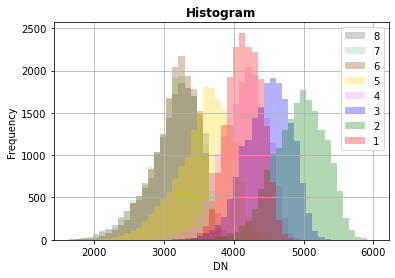

In [19]:
rasterio.plot.show_hist(img_A, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")
img_A.close()

c:\program files\python38\lib\site-packages\rasterio\__init__.py:229: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


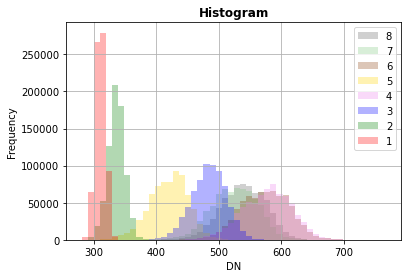

In [20]:
img_M = rasterio.open(os.path.join('sixteen_band','6010_0_0_M.tif'))
rasterio.plot.show_hist(img_M, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")
img_M.close()

c:\program files\python38\lib\site-packages\rasterio\__init__.py:229: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


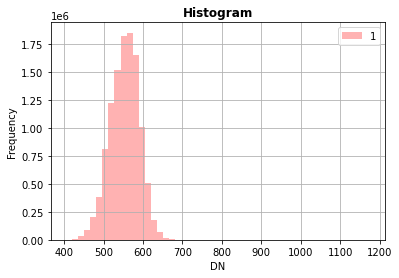

In [21]:
img_P = rasterio.open(os.path.join('sixteen_band','6010_0_0_P.tif'))
rasterio.plot.show_hist(img_P, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")
img_P.close()

In [40]:
images = ['6010_0_0', '6020_0_1', '6040_2_2']
n = ['A','M','P']

df_dict = {}
for img in images:
    for name in n:
        key = img+"_"+name
        file = key+'.tif'
        with rasterio.open(os.path.join('sixteen_band',file)) as f:
            df_dict[key] = f.tags()
        


In [41]:
df_16 = pd.DataFrame(df_dict).T

In [42]:
df_16['TIFFTAG_IMAGEDESCRIPTION'] = df_16['TIFFTAG_IMAGEDESCRIPTION'].str.replace('{','').str.replace('[','').str.replace(' ','').str.replace('\n','').str.replace(']','').str.replace('}','').str.replace('bandList=','')

In [43]:
df_16['TIFFTAG_IMAGEDESCRIPTION'] = df_16['TIFFTAG_IMAGEDESCRIPTION'].str.split(';')

In [44]:
df_16['TIFFTAG_IMAGEDESCRIPTION'] = df_16['TIFFTAG_IMAGEDESCRIPTION'].apply(lambda x: x[:-1])

In [45]:
df_16

TIFFTAG_COPYRIGHT  \
6010_0_0_A  (C) COPYRIGHT 2016 DigitalGlobe, Inc., Longmon...   
6010_0_0_M  (C) COPYRIGHT 2016 DigitalGlobe, Inc., Longmon...   
6010_0_0_P  (C) COPYRIGHT 2016 DigitalGlobe, Inc., Longmon...   
6020_0_1_A  (C) COPYRIGHT 2016 DigitalGlobe, Inc., Longmon...   
6020_0_1_M  (C) COPYRIGHT 2016 DigitalGlobe, Inc., Longmon...   
6020_0_1_P  (C) COPYRIGHT 2016 DigitalGlobe, Inc., Longmon...   
6040_2_2_A  (C) COPYRIGHT 2016 DigitalGlobe, Inc., Longmon...   
6040_2_2_M  (C) COPYRIGHT 2016 DigitalGlobe, Inc., Longmon...   
6040_2_2_P  (C) COPYRIGHT 2016 DigitalGlobe, Inc., Longmon...   

               TIFFTAG_DATETIME          TIFFTAG_IMAGEDESCRIPTION  \
6010_0_0_A  2016:03:30 20:00:05  [10, 11, 12, 13, 14, 15, 16, 17]   
6010_0_0_M  2016:03:30 19:57:53          [6, 2, 3, 7, 4, 8, 5, 9]   
6010_0_0_P  2016:03:30 19:57:46                               [1]   
6020_0_1_A  2016:03:30 20:37:24  [10, 11, 12, 13, 14, 15, 16, 17]   
6020_0_1_M  2016:03:30 20:37:01          [6, 2, 3, 7, 4, 8, 5, 9]   
6020_0_1_P  2016:03:30 20:36:59                               [1]   
6040_2_2_A  2016:03:30 20:00:12  [10, 11, 12, 13, 14, 15, 16, 17]   
6040_2_2_M  2016:03:30 19:57:11          [6, 2, 3, 7, 4, 8, 5, 9]   
6040_2_2_P  2016:03:30 19:57:09                               [1]   

           TIFFTAG_MAXSAMPLEVALUE TIFFTAG_MINSAMPLEVALUE  
6010_0_0_A                   6249                   1254  
6010_0_0_M                    799                    269  
6010_0_0_P                   1420                      0  
6020_0_1_A                  16383                    803  
6020_0_1_M                   2047                    142  
6020_0_1_P                   2047                      0  
6040_2_2_A                   5610                   1215  
6040_2_2_M                    798                    244  
6040_2_2_P                    792                      0

In [25]:
image_id = '6010_1_2'

test_img_16_M = rasterio.open(os.path.join('sixteen_band',image_id+'_M.tif'))
test_img_16_P = rasterio.open(os.path.join('sixteen_band',image_id+'_P.tif'))
test_img_16_A = rasterio.open(os.path.join('sixteen_band',image_id+'_A.tif'))
test_img_3 = rasterio.open(os.path.join('three_band',image_id+'.tif'))

In [29]:
print(test_img_16_M.shape)
print(test_img_16_P.shape)
print(test_img_16_A.shape)
print(test_img_3.shape)

(837, 849)
(3348, 3396)
(134, 136)
(3349, 3396)


In [32]:
print(np.array(test_img_16_M.read().T).shape)

(849, 837, 8)


In [9]:
test_img_16_nd = test_img_16_M.read(out_shape=(test_img_13.height,test_img_13.width))

In [15]:
test_img_13.read().shape

(3, 3349, 3396)

In [19]:
type(test_img_13.read())

numpy.ndarray

In [18]:
type(test_img_16_nd)

numpy.ndarray

In [23]:
np.concatenate([test_img_16_nd,test_img_13.read()]).shape

(11, 3349, 3396)

In [29]:
# help(test_img_16_M)

In [30]:
# t_M = test_img_16_M.transform
# t_A = test_img_16_A.transform

# old_height = test_img_16_M.height
# old_width = test_img_16_M.width

# new_height = test_img_16_P.height
# new_width = test_img_16_P.width

In [31]:
test_img_16_M_nd = test_img_16_M.read(out_shape=(int(test_img_16_P.height), int(test_img_16_P.width)))

In [32]:
# def resize_image(src_img, scaled_img):
#     t = src_img.transform
#     old_height = src_img.height
#     old_width = src_img.width
    
#     new_height = scaled_img.height
#     new_width = scaled_img.width
    
#     y_scale = new_height / old_height
#     x_scale = new_width / old_width
    
#     transformation = rasterio.Affine(t.a * x_scale, t.b,t.c,t.d,t.e * y_scale, t.f)
    
    
    

In [35]:
img_scaled = np.empty(test_img_16_M_nd.shape)
for i,band in enumerate(test_img_16_M_nd):
    img_max = np.max(band)
    img_min = np.min(band)

    scaled_band = (band - img_min) * 1/(img_max-img_min)

    img_scaled[i] = scaled_band


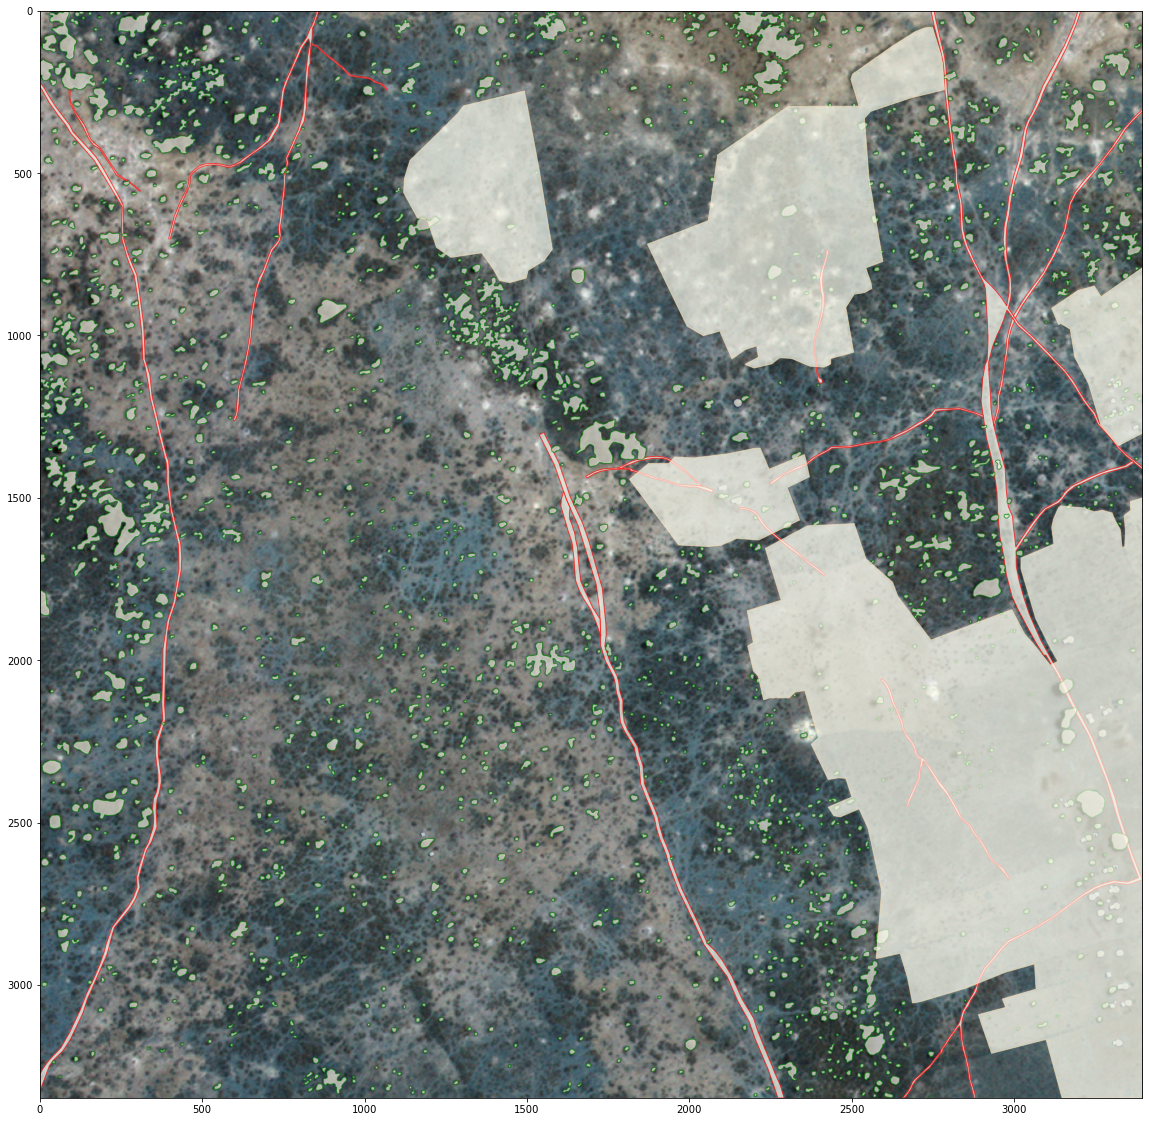

In [37]:
# scaled_test = utils.scale_image(test_img_16_M)

test_poly = utils.get_labeled_polygons(image_id, grid_sizes)

fig, ax = plt.subplots(1,figsize=(20,20))
utils.plot_polys(test_poly,axes=ax)
rplot.show(img_scaled[0:3],ax=ax)
# test_img_16.close()

In [24]:
test_img_16_M.close()
test_img_16_P.close()
test_img_16_A.close()

In [50]:
image_id = '6010_1_2'

test_img = rasterio.open(os.path.join('three_band',image_id+'.tif'))
scaled_test = utils.scale_pixels(test_img)

test_poly = utils.get_labeled_polygons(image_id, grid_sizes)

c:\program files\python38\lib\site-packages\rasterio\__init__.py:229: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [48]:
gdf_test = gpd.read_file('train_gdf.geojson')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'numpy.ndarray'>


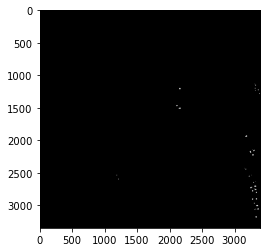

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'numpy.ndarray'>


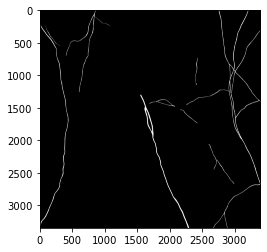

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'numpy.ndarray'>


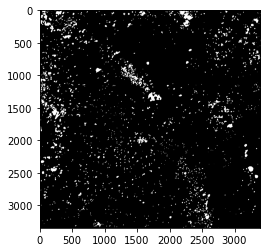

In [79]:
# fig, axes = plt.subplots(1,3,figsize=(21,7))

for i,geo in enumerate(gdf_test.loc[(gdf_test['ImageId']==image_id) & (gdf_test['geometry']!=None)]['geometry']):

    r_mask = mask.mask(test_img,geo)
    print(type(r_mask[0]))
    rplot.show(r_mask[0])

In [51]:
first_mask = raster_mask.mask(test_img,gdf_test.loc[(gdf_test['ImageId']==image_id) & (gdf_test['ClassType']==2)]['geometry'].values)

In [55]:
print(type(first_mask[0]))

<class 'numpy.ndarray'>


In [56]:
print(type(np.array(1)))

<class 'numpy.ndarray'>


In [54]:
print(np.concatenate(np.array(1),first_mask[0]))

TypeError: dispatcher for __array_function__ did not return an iterable

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


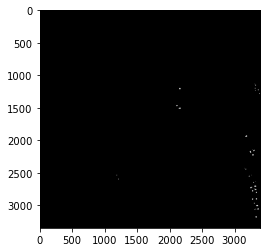

In [62]:
rplot.show(first_mask[0])

In [57]:
test_img.close()

In [58]:
os.sys.path

['C:\\Users\\dmsmo\\DataScience\\Udacity\\udacity_ml_engineer_projects\\3_Capstone',
 'c:\\program files\\python38\\python38.zip',
 'c:\\program files\\python38\\DLLs',
 'c:\\program files\\python38\\lib',
 'c:\\program files\\python38',
 '',
 'C:\\Users\\dmsmo\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\dmsmo\\AppData\\Roaming\\Python\\Python38\\site-packages\\win32',
 'C:\\Users\\dmsmo\\AppData\\Roaming\\Python\\Python38\\site-packages\\win32\\lib',
 'C:\\Users\\dmsmo\\AppData\\Roaming\\Python\\Python38\\site-packages\\Pythonwin',
 'c:\\program files\\python38\\lib\\site-packages',
 'c:\\program files\\python38\\lib\\site-packages\\win32',
 'c:\\program files\\python38\\lib\\site-packages\\win32\\lib',
 'c:\\program files\\python38\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\dmsmo\\AppData\\Roaming\\Python\\Python38\\site-packages\\IPython\\extensions',
 'C:\\Users\\dmsmo\\.ipython']